In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
datapath = Path("./data/heart_rate/")

In [3]:
train_df = pd.read_csv(datapath / "train.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          100000 non-null  object 
 1   CT          100000 non-null  float64
 2   MS          100000 non-null  float64
 3   MC          100000 non-null  float64
 4   B_Depth     100000 non-null  int64  
 5   LAT_ACCEL   100000 non-null  float64
 6   LONG_ACCEL  100000 non-null  float64
 7   E_Status    100000 non-null  int64  
 8   A_Depth     100000 non-null  int64  
 9   F_Economy   100000 non-null  float64
 10  Inhibit     100000 non-null  object 
 11  Elevation   100000 non-null  float64
 12  HR          100000 non-null  float64
dtypes: float64(8), int64(3), object(2)
memory usage: 9.9+ MB


In [5]:
train_df.head()

,ID,CT,MS,MC,B_Depth,LAT_ACCEL,LONG_ACCEL,E_Status,A_Depth,F_Economy,Inhibit,Elevation,HR
0,Train_00000,-0.066227,2.767421e+00,-0.278961,0,-0.520000,3.469447e-18,1,0,8.953112,D,8.188900,81.4575
1,Train_00001,0.011994,-4.496171e-23,-0.074691,0,0.243750,1.075000e-01,1,0,8.000000,D,9.451687,79.1544
2,Train_00002,-0.222929,1.182363e-24,0.000000,0,0.056000,6.400000e-02,1,0,9.882353,D,9.726455,75.9721
3,Train_00003,-0.198843,-2.527557e+00,-0.315785,0,-0.215333,6.800000e-02,0,0,32.843813,D,7.720026,90.0580
4,Train_00004,1.047843,5.819408e+01,-2.535030,0,-0.267500,1.800000e-01,0,0,33.882353,D,7.907762,76.9640


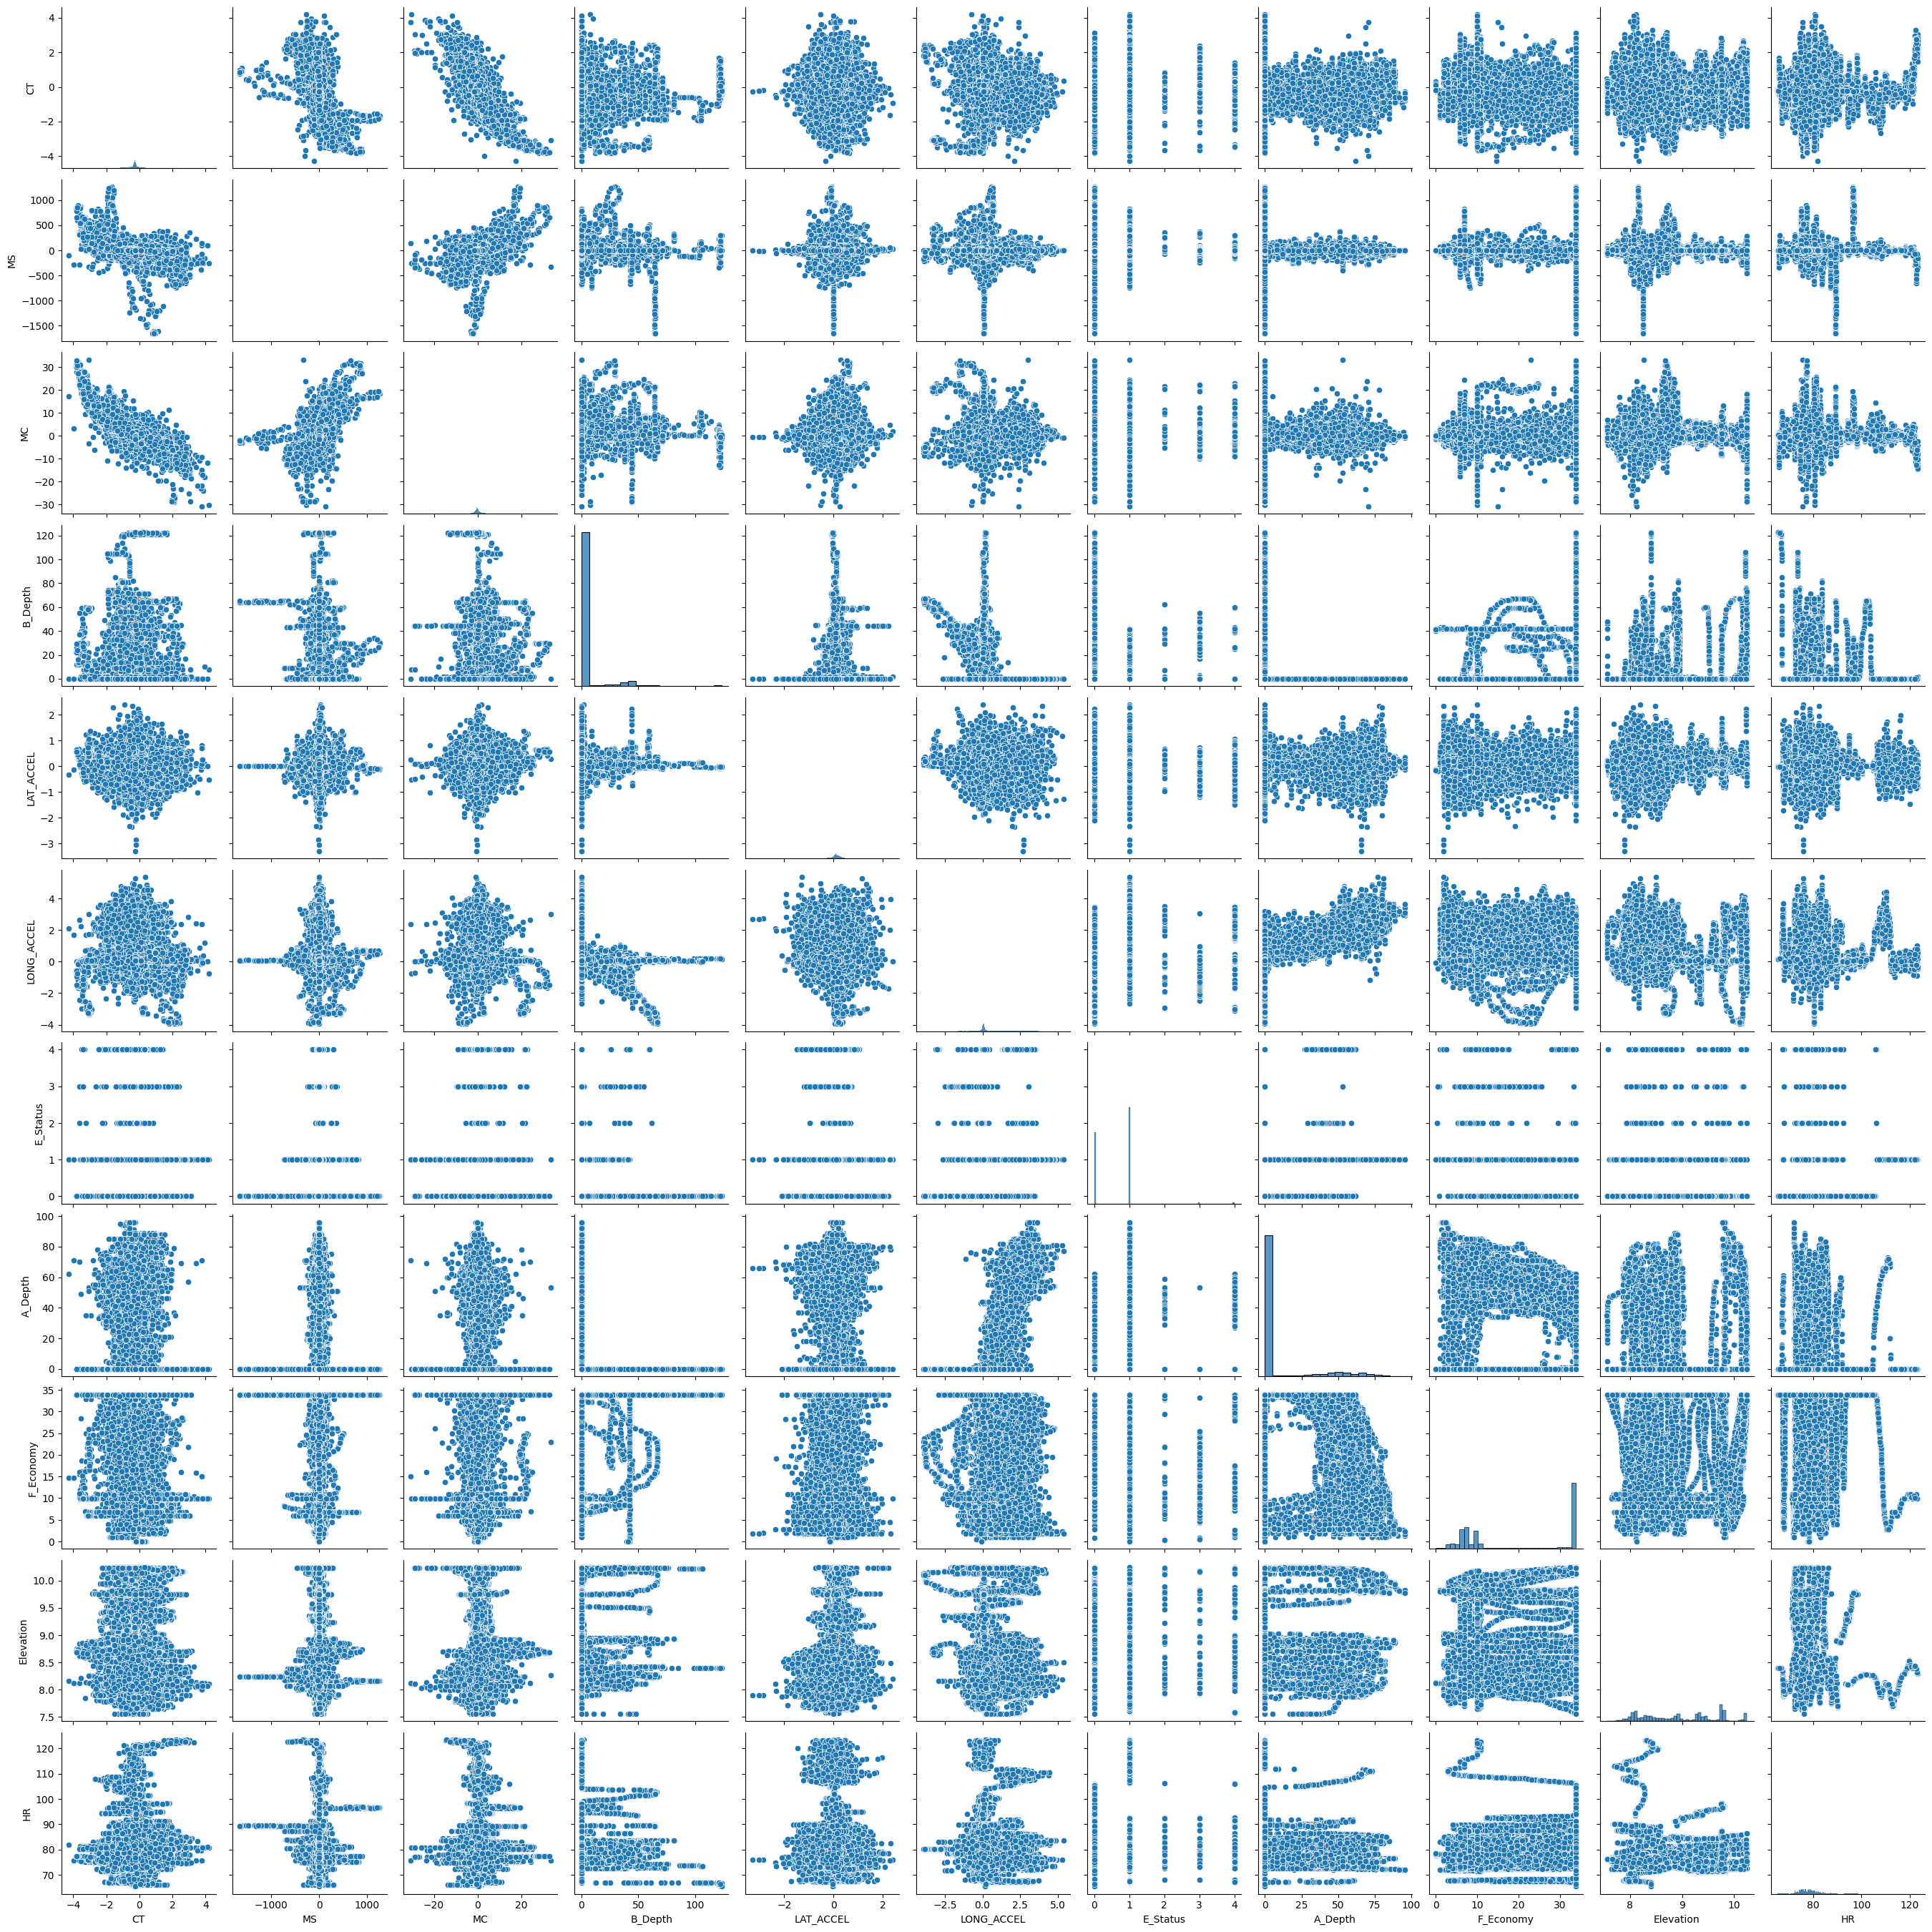

In [6]:
sns.pairplot(data=train_df)

In [7]:
train_df.head()

,ID,CT,MS,MC,B_Depth,LAT_ACCEL,LONG_ACCEL,E_Status,A_Depth,F_Economy,Inhibit,Elevation,HR
0,Train_00000,-0.066227,2.767421e+00,-0.278961,0,-0.520000,3.469447e-18,1,0,8.953112,D,8.188900,81.4575
1,Train_00001,0.011994,-4.496171e-23,-0.074691,0,0.243750,1.075000e-01,1,0,8.000000,D,9.451687,79.1544
2,Train_00002,-0.222929,1.182363e-24,0.000000,0,0.056000,6.400000e-02,1,0,9.882353,D,9.726455,75.9721
3,Train_00003,-0.198843,-2.527557e+00,-0.315785,0,-0.215333,6.800000e-02,0,0,32.843813,D,7.720026,90.0580
4,Train_00004,1.047843,5.819408e+01,-2.535030,0,-0.267500,1.800000e-01,0,0,33.882353,D,7.907762,76.9640


In [8]:
train_df.columns

Index(['ID', 'CT', 'MS', 'MC', 'B_Depth', 'LAT_ACCEL', 'LONG_ACCEL',
       'E_Status', 'A_Depth', 'F_Economy', 'Inhibit', 'Elevation', 'HR'],
      dtype='object')

In [10]:
# Features : 13
# numerical : 'CT', 'MS', 'MC', 'B_Depth', 'LAT_ACCEL', 'LONG_ACCEL', 'A_Depth', 'F_Economy', 'Elevation'
# categorical : 'E_Status', "Inhibit"
len(train_df.columns)

13

In [11]:
train_df["Inhibit"].value_counts()

Inhibit
D    96762
P     2601
R      615
N       22
Name: count, dtype: int64

In [12]:
train_df.isna().sum()

ID            0
CT            0
MS            0
MC            0
B_Depth       0
LAT_ACCEL     0
LONG_ACCEL    0
E_Status      0
A_Depth       0
F_Economy     0
Inhibit       0
Elevation     0
HR            0
dtype: int64

In [13]:
test_df = pd.read_csv(datapath / "test.csv")

In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49980 entries, 0 to 49979
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          49980 non-null  object 
 1   CT          49980 non-null  float64
 2   MS          49980 non-null  float64
 3   MC          49980 non-null  float64
 4   B_Depth     49980 non-null  int64  
 5   LAT_ACCEL   49980 non-null  float64
 6   LONG_ACCEL  49980 non-null  float64
 7   E_Status    49980 non-null  int64  
 8   A_Depth     49980 non-null  int64  
 9   F_Economy   49980 non-null  float64
 10  Inhibit     49980 non-null  object 
 11  Elevation   49980 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 4.6+ MB


In [15]:
test_df.isna().sum()

ID            0
CT            0
MS            0
MC            0
B_Depth       0
LAT_ACCEL     0
LONG_ACCEL    0
E_Status      0
A_Depth       0
F_Economy     0
Inhibit       0
Elevation     0
dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [17]:
# numerical : 'CT', 'MS', 'MC', 'B_Depth', 'LAT_ACCEL', 'LONG_ACCEL', 'A_Depth', 'F_Economy', 'Elevation'
# categorical : 'E_Status', "Inhibit"
num_features = ['CT', 'MS', 'MC', 'B_Depth', 'LAT_ACCEL', 'LONG_ACCEL', 'A_Depth', 'F_Economy', 'Elevation']
cat_features = ['E_Status', "Inhibit"]

In [19]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(train_df[num_features]), columns=num_features)
y = train_df["HR"]
test_x = pd.DataFrame(sc.transform(test_df[num_features]), columns=num_features)

In [20]:
onehot = OneHotEncoder(drop="first", sparse_output=False)
onehot.fit(train_df[cat_features])
onehot.get_feature_names_out()

array(['E_Status_1', 'E_Status_2', 'E_Status_3', 'E_Status_4',
       'Inhibit_N', 'Inhibit_P', 'Inhibit_R'], dtype=object)

In [21]:
X[onehot.get_feature_names_out()] = onehot.transform(train_df[cat_features])
test_x[onehot.get_feature_names_out()] = onehot.transform(test_df[cat_features])

In [22]:
X.columns, test_x.columns

(Index(['CT', 'MS', 'MC', 'B_Depth', 'LAT_ACCEL', 'LONG_ACCEL', 'A_Depth',
        'F_Economy', 'Elevation', 'E_Status_1', 'E_Status_2', 'E_Status_3',
        'E_Status_4', 'Inhibit_N', 'Inhibit_P', 'Inhibit_R'],
       dtype='object'),
 Index(['CT', 'MS', 'MC', 'B_Depth', 'LAT_ACCEL', 'LONG_ACCEL', 'A_Depth',
        'F_Economy', 'Elevation', 'E_Status_1', 'E_Status_2', 'E_Status_3',
        'E_Status_4', 'Inhibit_N', 'Inhibit_P', 'Inhibit_R'],
       dtype='object'))

In [24]:
round(X.describe(), 1)

,CT,MS,MC,B_Depth,LAT_ACCEL,LONG_ACCEL,A_Depth,F_Economy,Elevation,E_Status_1,E_Status_2,E_Status_3,E_Status_4,Inhibit_N,Inhibit_P,Inhibit_R
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
mean,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.1,0.1,0.0,0.2,0.1
min,-5.9,-26.4,-12.4,-0.3,-11.3,-4.9,-0.4,-1.5,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-0.4,-0.0,-0.4,-0.3,-0.3,-0.5,-0.4,-1.0,-0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,-0.0,-0.1,-0.3,0.1,-0.4,-0.4,-0.6,-0.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.3,0.0,0.3,-0.3,0.5,-0.1,-0.4,1.1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,6.7,20.1,13.2,8.3,7.7,5.5,4.2,1.1,1.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [26]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_log_error, r2_score

In [48]:
param_grid = {"max_depth": [30,35], "min_samples_leaf": [5,10]}
grid = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), param_grid=param_grid, 
                    cv=5, scoring="neg_root_mean_squared_log_error", n_jobs=-1)
grid.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [30, 35], 'min_samples_leaf': [5, 10]},
             scoring='neg_root_mean_squared_log_error')

In [49]:
grid.best_params_

{'max_depth': 35, 'min_samples_leaf': 5}

In [50]:
grid.score(train_x, train_y)

-0.025207402491896673

In [51]:
grid.score(valid_x, valid_y)

-0.03712527903376233

In [52]:
predict = grid.predict(valid_x)
r2_score(valid_y, grid.predict(valid_x))

0.6831577145607755

In [53]:
root_mean_squared_log_error(valid_y, grid.predict(valid_x))

0.03712527903376233

In [60]:
root_mean_squared_log_error(train_y, grid.predict(train_x))

0.025207402491896673

<Axes: xlabel='real value', ylabel='predictions'>

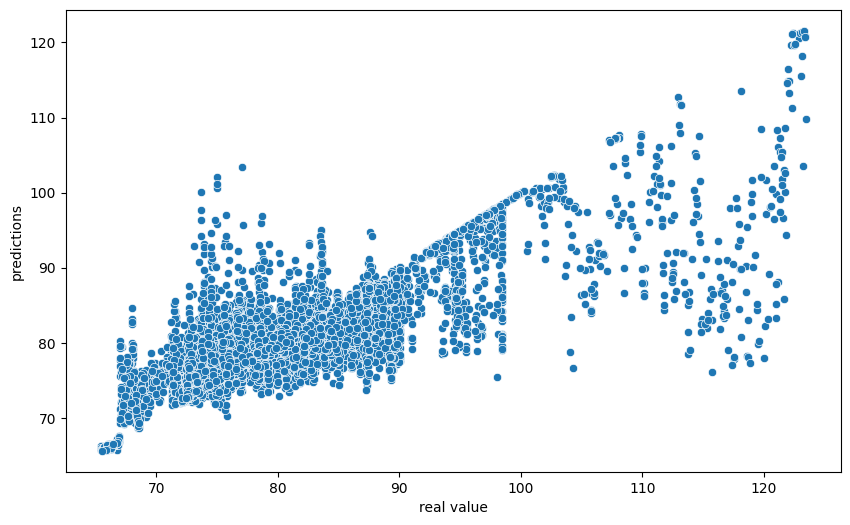

In [63]:
plt.figure(figsize=(10,6))
plt.xlabel("real value")
plt.ylabel("predictions")
sns.scatterplot(x=valid_y, y=predict)

<Axes: xlabel='HR', ylabel='Count'>

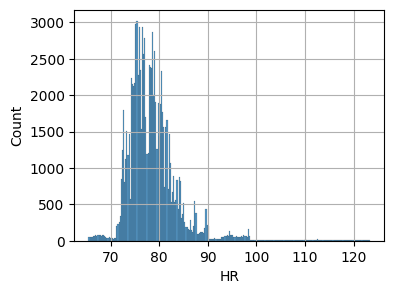

In [59]:
plt.figure(figsize=(4,3))
plt.grid()
sns.histplot(train_df, x="HR")

<Axes: xlabel='real value', ylabel='residuals'>

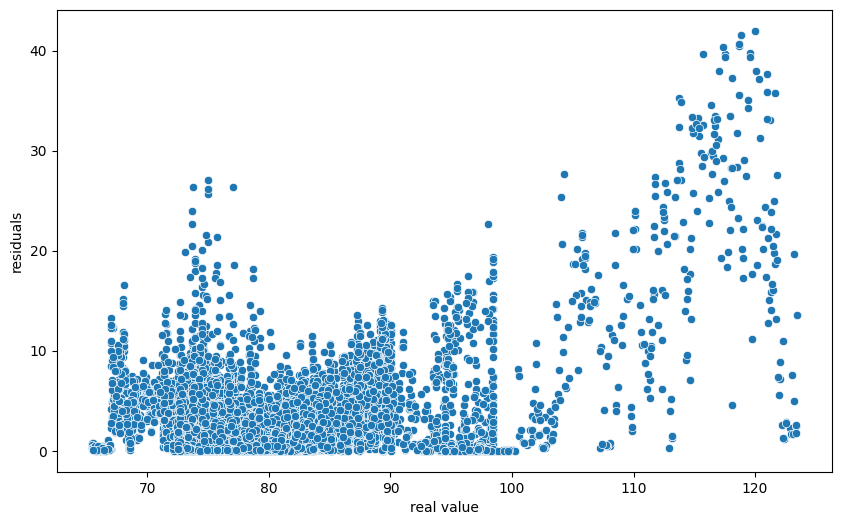

In [62]:
plt.figure(figsize=(10,6))
plt.xlabel("real value")
plt.ylabel("residuals")
sns.scatterplot(x=valid_y, y=abs(predict-valid_y))